In [1]:
from scipy.integrate import odeint
from math import *
from numpy import *
from matplotlib.pyplot import *

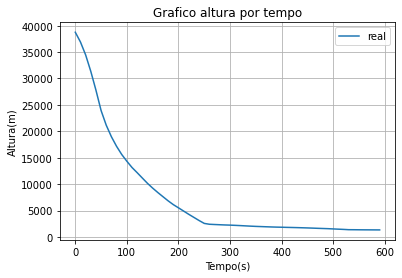

In [2]:
#lista de alturas que a gente pegou no video em pes(ft)

lista_altitude_pes = [127146, 121090, 113116, 102895, 91205, 78518, 69392, 62235, 56281, 51211, 46995, 43110, 39891, 36568, 33269, 30316, 27577, 24984, 22408, 20070, 18079, 16061, 14037, 12113, 10186, 8396, 7867, 7714, 7571, 7435, 7333, 7192, 7034, 6862, 6692, 6543, 6428, 6309, 6194, 6096, 6024, 5936, 5864, 5783, 5689, 5589, 5474, 5346, 5239, 5128, 4966, 4819, 4677, 4495, 4476,4438,4410,4395,4374,4356]
lista_tempo = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550,560,570,580,590]
lista_alt = []

#codigo para transformar pes em metros
for j in lista_altitude_pes:
  lista_alt.append(j*0.3048)

#plotar graficos
plot(lista_tempo,lista_alt,label = 'real')
title('Grafico altura por tempo')
xlabel('Tempo(s)')
ylabel('Altura(m)')
legend()
grid(True)
show()

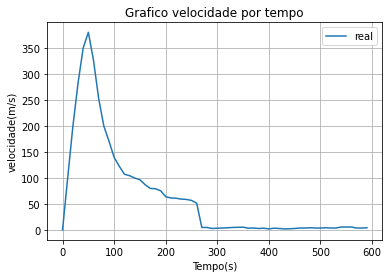

In [3]:
#lista de velocidades km/hora
lista_tempo1 = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570,580,590]
lista_velocidade = [0,361, 715, 1014, 1258, 1367, 1173, 909, 719, 614, 502, 440, 385, 375, 359, 347, 313, 287, 285, 271, 230, 221, 219, 213, 211, 204, 185, 17, 17, 10, 12, 13, 15, 17, 18, 19, 12, 13, 10, 12, 7, 12, 10, 7, 8, 10, 13, 13, 15, 13, 13, 15, 13, 13, 20, 20, 20, 13,13,15]

lista_vn = []

#codigo para converter km/h para m/s
for i in lista_velocidade:
  lista_vn.append(i/3.6)


plot(lista_tempo1,lista_vn,label = 'real')
title('Grafico velocidade por tempo')
xlabel('Tempo(s)')
ylabel('velocidade(m/s)')
legend()
grid(True)
show()

In [4]:
#Parâmetros 
#peso hage 77

#Peso do paraquedista 
m_paraquedista = 77 #https://acordeemny.com.br/felix-baumgartner-idade-altura-e-peso/

#Peso do traje medio 
m_traje = 13 #https://pt.wikipedia.org/wiki/Red_Bull_Stratos#Paraquedas

#peso conjunto 
m_total = m_paraquedista + m_traje 

#densidade do ar (kg/m3)   #https://www.engineeringtoolbox.com/standard-atmosphere-d_604.html
d = 1.225


#altura (m)
h = 39045
h_abertura = 2516

#gravidade 
g = 9.81 #m/s^2

#peso 
P = m_total * g

#Drag - Arrasto 
#D = (1/2)*d*(v**2)*Cd*area

#Areas (m2)
areaF = 0.5 #https://www.calculator.net/body-surface-area-calculator.html?csex=m&bodyweight=70&bodyweightunit=kilogram&bodyheightfeet=&bodyheightinch=&bodyheight=170&x=69&y=28
areaP = 70

tempo_abertura = 0

In [5]:
#codigo do nosso modelo
def modelo(x,t):
  global tempo_abertura
  y = x[0]
  vy = x[1]
#se a altura for maior que a altura de abertura conta a area como a area de uma pessoa e o constante de arrasto humano
  if y >= h_abertura:
    area = areaF 
    c = 1.3 #https://www.engineeringtoolbox.com/drag-coefficient-d_627.html
    tempo_abertura = t
#apos a abertura do paraquedas area como a do paraquedas e constante de arrasto paraquedas
  elif t < (tempo_abertura + 20) and y < h_abertura: 
    #area = areaP
    area = areaF + (69.6/20) * (t - tempo_abertura)  
    c = 2 #https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/rktvrecv.html#:~:text=Typical%20values%20of%20drag%20coefficient,produces%20a%20lower%20terminal%20velocity.
    
  else:
    area = areaP
    c = 2 
  
  
#calcular a variacao da densidade do ar variando com a altura
  dvar = d*exp(-y/7500)

#formula do arrasto
  A = (1/2)*dvar*(vy**2)*c*area

  
  dydt = vy
  dvydt = (-P + A)/m_total
#se altura for menor/igual a zero tudo vai ser igual a zero porque o paraquedista ja esta no chao
  if y <= 0:
        dydt = 0  
        dvydt = 0
  dadt = [dydt, dvydt]
  return dadt


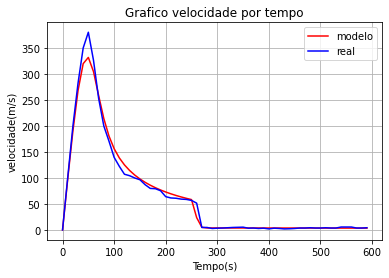

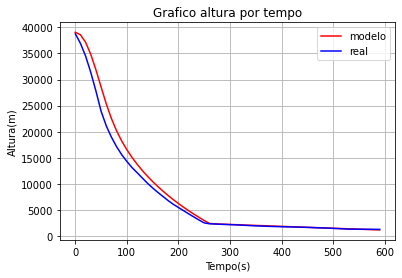

In [6]:
#valores iniciais
y0 = h #altura do salto
vy0 = 0

x_0 = [y0, vy0]

dt = 10
t_lista = arange(0,600,dt)

X = odeint(modelo,x_0,t_lista)


y= X[:,0]

vy= X[:,1]


#plotar grafico da altura pelo tempo (modelo x real)
plot(t_lista, -vy,  'r', label = 'modelo')
plot(lista_tempo1,lista_vn,'b',label = 'real')
title('Grafico velocidade por tempo')
xlabel('Tempo(s)')
ylabel('velocidade(m/s)')
legend()
grid(True)
show()

#plotar grafico velocidade pelo tempo (modelo x real)
plot(t_lista, y,'r', label = 'modelo')
plot(lista_tempo,lista_alt,'b',label = 'real')
title('Grafico altura por tempo')
xlabel('Tempo(s)')
ylabel('Altura(m)')
legend()
grid(True)
show()

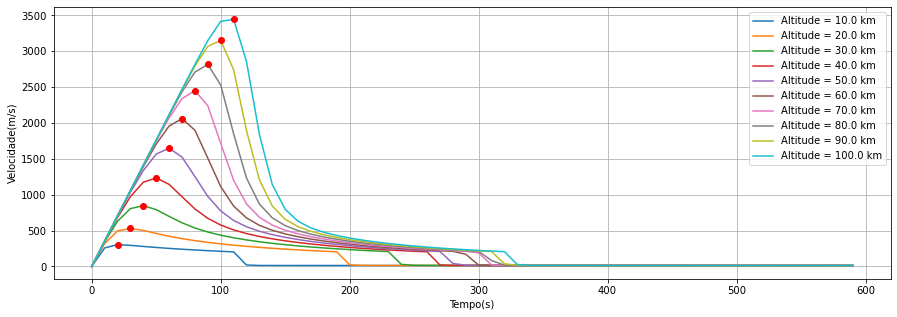

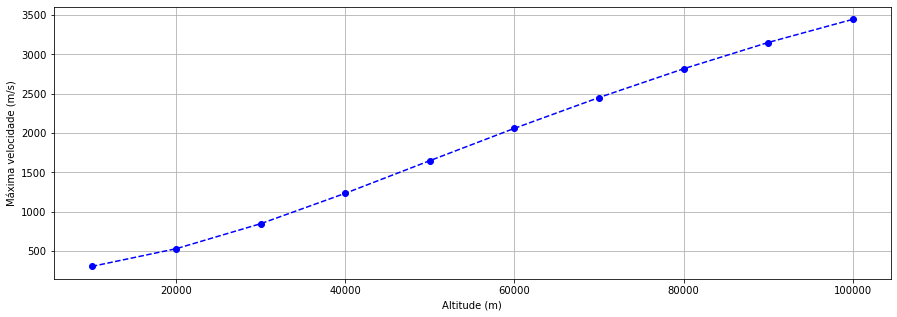

In [7]:
#criando intervalo
Hs = arange(10000,100001,10000)
#lista para guardar as maiores velocidades
picos_de_velocidade = []
#atribuindo altura inicial ao h_0
h_0 = h
#lista de condições iniciais
X_0 = [h_0,0]

figure(figsize=(15, 5))
#percorrendo a lista de hs 
for i in range(len(Hs)): 
    X_0 = [Hs[i],0]
    #executando odeint
    W = odeint(modelo,X_0,t_lista)
    #destrinchando valores
    lista_y_2 = W[:,0]
    lista_vy_2 = -W[:,1] * 3.6 
    #armazaenando os valores de velocidade máxima 
    max_velocidade = max(lista_vy_2)
    #plotando altitudes
    plot(t_lista[0:10000], lista_vy_2[0:10000], label=f"Altitude = {Hs[i]/1000} km")
    for j in range(len(t_lista)):
        if lista_vy_2[j] == max_velocidade:
            t_max = t_lista[j]
            picos_de_velocidade.append(max(lista_vy_2[0:1500]))
    plot(t_max, max_velocidade, "ro--")

xlabel('Tempo(s)')
ylabel('Velocidade(m/s)')
legend()
grid(True)
show()

figure(figsize=(15, 5))
plot(Hs, picos_de_velocidade, 'bo--')
xlabel('Altitude (m)')
ylabel('Máxima velocidade (m/s)')
grid(True)
show()



In [8]:
#comeco grafico conclusivo variando as massas
def modelo2(x,t,m):
  global tempo_abertura
  y = x[0]
  vy = x[1]
#se a altura for maior que a altura de abertura conta a area como a area de uma pessoa e o constante de arrasto humano
  if y >= h_abertura:
    area = areaF 
    c = 1.3 #https://www.engineeringtoolbox.com/drag-coefficient-d_627.html
    tempo_abertura = t
#apos a abertura do paraquedas area como a do paraquedas e constante de arrasto paraquedas
  elif t < (tempo_abertura + 20) and y < h_abertura: 
    #area = areaP
    area = areaF + (69.6/20) * (t - tempo_abertura)  
    c = 2 #https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/rktvrecv.html#:~:text=Typical%20values%20of%20drag%20coefficient,produces%20a%20lower%20terminal%20velocity.
    
  else:
    area = areaP
    c = 2 
  
  
#calcular a variacao da densidade do ar variando com a altura
  dvar = d*exp(-y/7500)

#formula do arrasto
  A = (1/2)*dvar*(vy**2)*c*area

  
  dydt = vy
  dvydt = (-P + A)/m_total
#se altura for menor/igual a zero tudo vai ser igual a zero porque o paraquedista ja esta no chao
  if y <= 0:
        dydt = 0  
        dvydt = 0
  dadt = [dydt, dvydt]
  return dadt


In [54]:
'''y0 = ht 
vy0 = 0
a0 = [ y0, vy0]

dt = 10
t = arange(0,600,dt)

y=a[:,0]
vy=a[:,1]

#funcao para ver quanto tempo Felix atingira a velocidade maxima
def tempomax(listaV, listaT):
  for i in range(0,len(listaV)):
    if listaV[i] <= min(vy):
      return listaT[i]
#lista de massas
l_massa = [55,110,220,440,880]
tempomaxlista = []

#looping para plotarmos o grafico
i = 0
while i < len(l_massa):
    x = odeint(modelo2, a0, t, args = (l_massa[i],))
    plot(t,-x[:,1],label = 'Massas %.0f' %l_massa[i])
    tempomaxlista.append(tempomax(x[:,1],t))
    i+=1'''


#criando intervalo
def tempomax(lista_velocidade,lista_tempo):
  for i in range(0,len(lista_velocidade)):
    if lista_velocidade[i] <= min(lista_vy_2):
      return lista_tempo[i]

l_massa = [55,110,220,440,880]
tempomaxlista = []

for i in range(len(l_massa)):
  M = odeint(modelo2,x_0,t_lista,args=(l_massa[i],))
  lista_y_2 = M[:,0]
  lista_vy_2 = -M[:,1] * 3.6
  plot(t_lista,lista_vy_2,label="Massas %.0f"%l_massa[i])
  tempomaxlista.append(tempomax(lista_vy_2,t_lista)) 
  break

xlabel('Tempo(s)')
ylabel('Velocidade(m/s)')
legend()
grid(True)
show()

figure(figsize=(15, 5))
plot(l_massa, tempomaxlista, 'bo--')
xlabel('Massas (m)')
ylabel('Máxima velocidade (m/s)')
grid(True)
show()




c:\Users\bueno\OneDrive\Anexos\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
